In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("C:/NewDriveD/COding/Alok_mastor/Alok-Mastor/Dataset/parkinsons_updrs.csv")
# data.head()

In [5]:
# Check for NaN values
nan_values = data.isna().sum()
# print(nan_values)

# Correct NaN values by filling them with appropriate values
# data.fillna(value, inplace=True)


In [6]:
skewness = data.skew()
# print(skewness)


In [7]:
import pandas as pd
import numpy as np

# Assuming 'data' is the DataFrame containing your dataset
column_names = list(data.columns)

outliers = []
for col_name in column_names:
    # Calculate the IQR for the column
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1

    # Define the upper and lower bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Find the outliers in the column
    column_outliers = data[(data[col_name] < lower_bound) | (data[col_name] > upper_bound)]
    outliers.append(column_outliers)

# Print the outliers for each column
# for i, col_name in enumerate(column_names):
#     print(f"Outliers in column '{col_name}':")
#     print(outliers[i])
#     print()


In [8]:

column_names = list(data.columns)
column_names = column_names[:-1]

skewedCols = []
for names in column_names:
    skewVal = data[names].skew()
    if(skewVal>1 or skewVal<-1):
        skewedCols.append(names)
# print(skewedCols)
# print(len(skewedCols))

#   Name of the cols containing atleast one negative value
skewedCols_NegativeVals = []
for col_name in skewedCols:
    for values in data[col_name]:
        if(values < 0):
            skewedCols_NegativeVals.append(col_name)
            break
# print(len(skewedCols_NegativeVals))

#   Name of the cols containing atleast one zero values
skewedCols_ZeroVals = []
for col_name in skewedCols:
    if col_name in skewedCols_NegativeVals:
        continue
    else:
        for values in data[col_name]:
            if(values == 0):
                skewedCols_ZeroVals.append(col_name)
                break
# print(len(skewedCols_ZeroVals))

#   Name of the cols containing only positive values
skewedCols_PositiveVals = []
for col_name in skewedCols:
    if (col_name not in skewedCols_NegativeVals and col_name not in skewedCols_ZeroVals):
        skewedCols_PositiveVals.append(col_name)
# print(len(skewedCols_PositiveVals))

#   Box-Cox Transformation
for col_name in skewedCols_PositiveVals:
    data[col_name] = stats.boxcox(data[col_name],lmbda=0)

count = 0
for col_name in skewedCols_PositiveVals:
    skewVal = data[col_name].skew()
    if skewVal>1 or skewVal<-1:
        count = count + 1
# print(count)
# print(data)

#   CubeRoot Transformation on skewedCols_NegativeVals & skewedCols_ZeroVals
for col_name in skewedCols_NegativeVals:
    data[col_name] = np.cbrt(data[col_name])
for col_name in skewedCols_ZeroVals:
    data[col_name] = np.cbrt(data[col_name])

count = 0
for col_name in skewedCols_NegativeVals:
    skewVal = data[col_name].skew()
    if skewVal>1 or skewVal<-1:
        count = count + 1
# print(count)
# print(data)

import statistics
for col_name in column_names:
    qi = data[col_name].quantile(0.25)
    qf = data[col_name].quantile(0.75)

    iqr = qf - qi
    c = 1.5
    upper_limit=qf+c*iqr
    lower_limit=qi-c*iqr

    col_median = statistics.mean(data[col_name].to_numpy())
    for val in data[col_name]:
        if val < lower_limit or val > upper_limit:
            data[col_name] = data[col_name].replace(val,col_median)


In [ ]:
# data['severity'] = data['motor_UPDRS'].apply(lambda x: 0 if 0 < x < 20 else 1)

In [ ]:
# Y1 = data['severity']
# # Y2 = data['motor_UPDRS']
# X1 = data.drop(['subject#', 'motor_UPDRS', 'age','sex','test_time','severity'], axis=1)
# X2 = data.drop(['subject#', 'total_UPDRS', 'age','sex','test_time','severity'], axis=1)
# print(X2.shape)
# print(Y1.shape)

In [9]:
Y2=data['total_UPDRS']
X2=data.drop(['subject#', 'total_UPDRS', 'age','sex','test_time'], axis=1)
print(X2.shape)
print(Y2.shape)

(5875, 17)
(5875,)


In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X2 = pca.fit_transform(X2)
print(X2.shape)

(5875, 10)


In [11]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit on the data and then transform it
X2 = scaler.fit_transform(X2)

print(X2.shape)

(5875, 10)


In [12]:
X2_df = pd.DataFrame(X2)
X2_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.847199,-0.063192,0.028292,0.757173,-1.187433,-1.793582,0.952144,0.207102,0.687817,-0.566096
1,0.816244,-1.609942,0.711638,-0.346155,0.671074,0.020078,0.011762,0.104568,-0.359349,-0.332403
2,0.888932,-0.548407,-0.903670,0.845356,0.638511,-0.509193,-0.552555,-0.039141,0.701841,-1.088397
3,0.904742,-0.808346,0.767980,0.490889,1.354179,0.004596,-0.817957,-2.108059,0.367003,-1.354926
4,0.915364,-1.407431,-0.320953,-0.312462,0.929607,1.474265,-1.230201,-0.401273,0.122989,-1.419875


In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y2_train, Y2_test = train_test_split(X2_df, Y2, test_size=0.1, random_state=42)

# Define the MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(64,32,64), learning_rate_init=0.001, max_iter=9000, random_state=42)

# Fit the model to the training data
model.fit(X_train, Y2_train)

# Predict the training data
Y2_train_pred = model.predict(X_train)

# Calculate the training loss and R2 score
train_loss = mean_squared_error(Y2_train, Y2_train_pred)
train_r2 = r2_score(Y2_train, Y2_train_pred)

print(f'Training Loss: {train_loss:.4f}, Training R2 Score: {train_r2:.4f}')

# Predict the testing data
Y2_test_pred = model.predict(X_test)

# Calculate the testing loss and R2 score
test_loss = mean_squared_error(Y2_test, Y2_test_pred)
test_r2 = r2_score(Y2_test, Y2_test_pred)

print(f'Testing Loss: {test_loss:.4f}, Testing R2 Score: {test_r2:.4f}')

Training Loss: 3.3553, Training R2 Score: 0.9709
Testing Loss: 6.0932, Testing R2 Score: 0.9430


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


from sklearn.metrics import mean_squared_error

# Create instances of the regressors
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
svr = SVR()

# Fit the models on the training data
linear_reg.fit(X_train, Y2_train)
decision_tree_reg.fit(X_train, Y2_train)
svr.fit(X_train, Y2_train)

# Predict on the training and testing data
linear_reg_train_preds = linear_reg.predict(X_train)
linear_reg_test_preds = linear_reg.predict(X_test)

decision_tree_train_preds = decision_tree_reg.predict(X_train)
decision_tree_test_preds = decision_tree_reg.predict(X_test)

# Predict on the training and testing data
svr_train_preds = svr.predict(X_train)
svr_test_preds = svr.predict(X_test)


# Calculate R2 score for linear regression
linear_reg_train_r2 = r2_score(Y2_train, linear_reg_train_preds)
linear_reg_test_r2 = r2_score(Y2_test, linear_reg_test_preds)

# Calculate R2 score for decision tree regression
decision_tree_train_r2 = r2_score(Y2_train, decision_tree_train_preds)
decision_tree_test_r2 = r2_score(Y2_test, decision_tree_test_preds)

# Calculate R2 score for SVR
svr_train_r2 = r2_score(Y2_train, svr_train_preds)
svr_test_r2 = r2_score(Y2_test, svr_test_preds)


# Calculate loss for linear regression
linear_reg_train_loss = mean_squared_error(Y2_train, linear_reg_train_preds)
linear_reg_test_loss = mean_squared_error(Y2_test, linear_reg_test_preds)

# Calculate loss for decision tree regression
decision_tree_train_loss = mean_squared_error(Y2_train, decision_tree_train_preds)
decision_tree_test_loss = mean_squared_error(Y2_test, decision_tree_test_preds)

# Calculate loss for random forest regression
svr_train_loss = mean_squared_error(Y2_train, svr_train_preds)
svr_test_loss = mean_squared_error(Y2_test, svr_test_preds)


# Print the R2 score and loss for linear regression
print("Linear Regression:")
print("Training R2 Score:", linear_reg_train_r2)
print("Testing R2 Score:", linear_reg_test_r2)
print("Training Loss:", linear_reg_train_loss)
print("Testing Loss:", linear_reg_test_loss)
print()

# Print the R2 score and loss for decision tree regression
print("Decision Tree Regression:")
print("Training R2 Score:", decision_tree_train_r2)
print("Testing R2 Score:", decision_tree_test_r2)
print("Training Loss:", decision_tree_train_loss)
print("Testing Loss:", decision_tree_test_loss)
print()

# Print the R2 score and loss for random forest regression
print("Support Vector Regression:")
print("Training R2 Score:", svr_train_r2)
print("Testing R2 Score:", svr_test_r2)
print("Training Loss:", svr_train_loss)
print("Testing Loss:", svr_test_loss)

Linear Regression:
Training R2 Score: 0.9027736962423663
Testing R2 Score: 0.9031483490367289
Training Loss: 11.20990035801535
Testing Loss: 10.345042798087096

Decision Tree Regression:
Training R2 Score: 1.0
Testing R2 Score: 0.9069991987941443
Training Loss: 2.256019838649839e-31
Testing Loss: 9.933720893367347

Support Vector Regression:
Training R2 Score: 0.9048343592589045
Testing R2 Score: 0.8917385296888605
Training Loss: 10.972312110863378
Testing Loss: 11.563763060449006


In [24]:
loss_lst_trn=[3.3553, 11.20990035801535, 2.256019838649839e-31, 10.972312110863378]
loss_lst_test=[6.0932, 10.345042798087096, 9.933720893367347, 11.563763060449006]
r2_trn=[0.9709, 0.9027736962423663, 1.0, 0.9048343592589045]
r2_test=[0.9430, 0.9031483490367289, 0.9081743474454136, 0.8917385296888605]

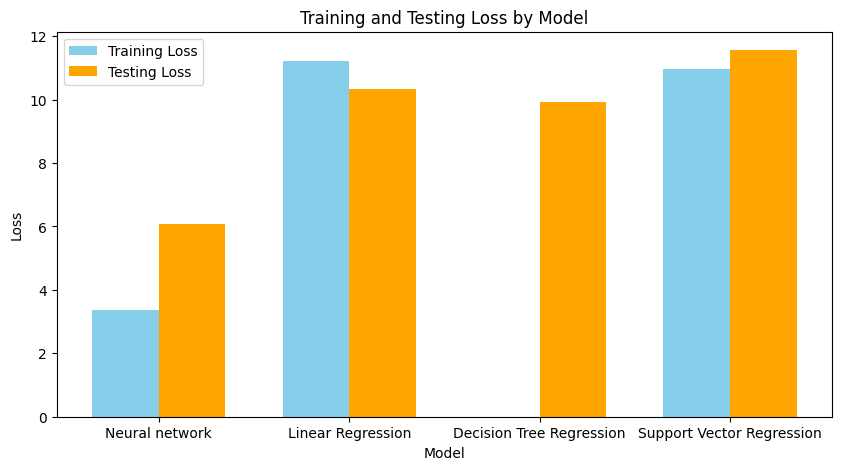

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Neural network', 'Linear Regression', 'Decision Tree Regression','Support Vector Regression']

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 5))



# Set the bar width
bar_width = 0.35

# Positions of the left bar boundaries
bar_l = np.arange(len(loss_lst_trn))

# Positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i + (bar_width / 2) for i in bar_l]

# Create the total score for each participant
totals = [i + j for i, j in zip(loss_lst_trn, loss_lst_test)]

# Create a bar plot for each score
trn_bar = ax.bar(bar_l, loss_lst_trn, width=bar_width, label='Training Loss', color='skyblue')
test_bar = ax.bar(bar_l + bar_width, loss_lst_test, width=bar_width, label='Testing Loss', color='orange')

# Set the y label
ax.set_ylabel('Loss')

# Set the x label
ax.set_xlabel('Model')

# Set the title
ax.set_title('Training and Testing Loss by Model')

# Set the x ticks with names
ax.set_xticks(tick_pos)
ax.set_xticklabels(models)

# Adding the legend and showing the plot
ax.legend()
plt.show()

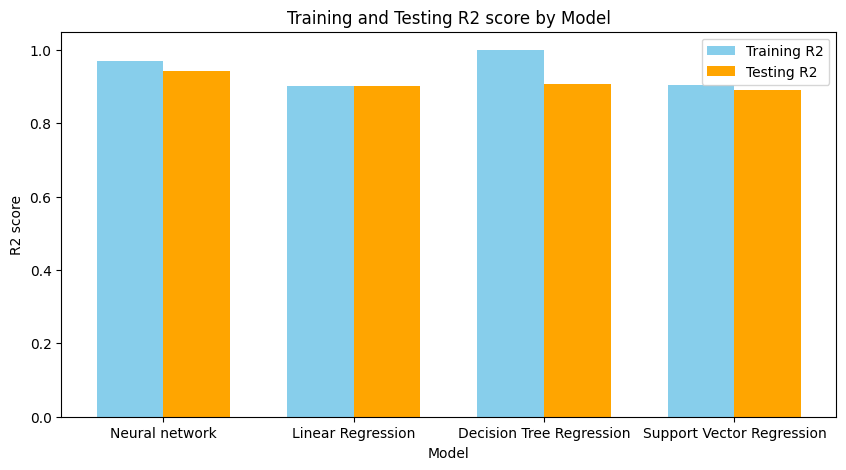

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Neural network', 'Linear Regression', 'Decision Tree Regression','Support Vector Regression']

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 5))



# Set the bar width
bar_width = 0.35

# Positions of the left bar boundaries
bar_l = np.arange(len(r2_trn))

# Positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i + (bar_width / 2) for i in bar_l]

# Create the total score for each participant
totals = [i + j for i, j in zip(r2_trn, r2_test)]

# Create a bar plot for each score
trn_bar = ax.bar(bar_l, r2_trn, width=bar_width, label='Training R2', color='skyblue')
test_bar = ax.bar(bar_l + bar_width, r2_test, width=bar_width, label='Testing R2', color='orange')

# Set the y label
ax.set_ylabel('R2 score')

# Set the x label
ax.set_xlabel('Model')

# Set the title
ax.set_title('Training and Testing R2 score by Model')

# Set the x ticks with names
ax.set_xticks(tick_pos)
ax.set_xticklabels(models)

# Adding the legend and showing the plot
ax.legend()
plt.show()

C:\Users\senso\AppData\Local\Temp\ipykernel_20200\4268467252.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y2_test.min(), Y2_test.max()], [Y2_test.min(), Y2_test.max()], 'k--', lw=2, color='red')


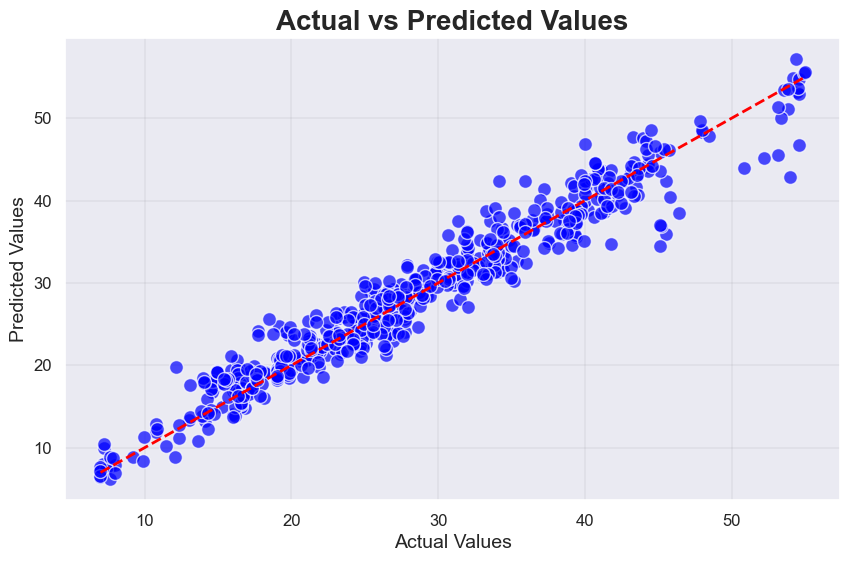

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the testing data
Y2_test_pred = model.predict(X_test)

# Set a theme
sns.set_theme()

# Create a new figure
plt.figure(figsize=(10, 6))

# Create a scatter plot of the actual vs predicted values
plt.scatter(Y2_test, Y2_test_pred, color='blue', edgecolor='white', s=100, alpha=0.7)

# Add a line for perfect correlation
plt.plot([Y2_test.min(), Y2_test.max()], [Y2_test.min(), Y2_test.max()], 'k--', lw=2, color='red')

# Add title and labels for the axes
plt.title('Actual vs Predicted Values', fontsize=20, fontweight='bold')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

# Increase tick size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the testing data
Y2_test_pred = model.predict(X_test)

# Set a theme
sns.set_theme()

# Compute percent error
percent_error = []
for i in range(len(targets_test_np)):
    percent_error.append(np.abs((targets_test_np[i] - outputs_test_np[i][0]) / targets_test_np[i]) * 100)

# Create a new figure
plt.figure(figsize=(10, 6))

# Create a histogram of the percent error
sns.histplot(percent_error, bins=20, kde=True, color='red', edgecolor='black', linewidth=1.2)

# Add title and labels for the axes
plt.title('Percent Error Distribution', fontsize=20, fontweight='bold')
plt.xlabel('Percent Error', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Increase tick size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

# Show the plot
plt.show()

<h1><b>PyTorch regression model

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score

# # Define the neural network model
# class RegressionModel(nn.Module):
#     def __init__(self, input_size, h1, h2, h3, output_size):
#         super(RegressionModel, self).__init__()
#         self.fc1 = nn.Linear(input_size, h1)
#         self.fc2 = nn.Linear(h1, h2)
#         self.fc3 = nn.Linear(h2, h3)
#         self.fc4 = nn.Linear(h3, output_size)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.fc2(x)
#         x = self.fc3(x)
#         x= self.fc4(x)
#         x = self.relu(x)
#         return x

# # Split the data into training and testing sets
# X_train, X_test, Y2_train, Y2_test = train_test_split(X2_df, Y2, test_size=0.1, random_state=42)

# # Convert the data to PyTorch tensors
# X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
# Y2_train_tensor = torch.tensor(Y2_train.values, dtype=torch.float32)
# X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
# Y2_test_tensor = torch.tensor(Y2_test.values, dtype=torch.float32)

# # Define the hyperparameters
# input_size = X_train.shape[1]
# # hidden_size = 10
# h1=10
# h2=20
# h3=10
# output_size = 1
# learning_rate = 0.001
# num_epochs = 9000

# # Create an instance of the regression model
# model = RegressionModel(input_size, h1,h2,h3, output_size)

# # Define the loss function and optimizer
# criterion = nn.SmoothL1Loss()
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# best_model = None
# best_epoch = -1
# best_loss = float('inf')

# # Before the training loop
# Y2_train_tensor = Y2_train_tensor.view(-1, 1)

# errors = []
# accuracies = []

# # Lists to store the metrics
# train_loss_list = []
# test_loss_list = []
# train_r2_list = []
# test_r2_list = []

# # Training loop
# for epoch in range(num_epochs):
#     # Forward pass
#     outputs = model(X_train_tensor)
#     loss = criterion(outputs, Y2_train_tensor)

#      # Compute R2 score
#     outputs_np = outputs.detach().numpy()
#     targets_np = Y2_train_tensor.numpy()
#     r2 = r2_score(targets_np, outputs_np)


#     # Backward and optimize
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     # Calculate error and accuracy here...
#     # errors.append(loss.item())
#     # accuracies.append(r2)

#     # Check if this model is better than the previous best model
#     if loss.item() < best_loss:
#         best_model = model
#         best_epoch = epoch
#         best_loss = loss.item()
#         best_r2 = r2

#     # Print the loss for every 100 epochs
#     if (epoch+1) % 450 == 0:
#         model.eval()
#         with torch.no_grad():
#             outputs_test = model(X_test_tensor)
#             loss_test = criterion(outputs_test, Y2_test_tensor.view(-1, 1))

#         # Compute R2 score for the testing set
#         outputs_test_np = outputs_test.detach().numpy()
#         targets_test_np = Y2_test_tensor.numpy()
#         r2_test = r2_score(targets_test_np, outputs_test_np)

#         # Store the metrics
#         train_loss_list.append(loss.item())
#         test_loss_list.append(loss_test.item())
#         train_r2_list.append(r2)
#         test_r2_list.append(r2_test)

#         # Print the metrics        
#         print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, R2 Score: {r2:.4f}')

# # Print the metrics for the best model
# print(f'Best Model, Epoch [{best_epoch+1}/{num_epochs}], Loss: {best_loss:.4f}, R2 Score: {best_r2:.4f}')

# # Evaluate the best model on the testing set
# model.eval()
# with torch.no_grad():
#     outputs_test = best_model(X_test_tensor)
#     loss_test = criterion(outputs_test, Y2_test_tensor.view(-1, 1))

# # Compute R2 score for the testing set
# outputs_test_np = outputs_test.detach().numpy()
# targets_test_np = Y2_test_tensor.numpy()
# r2_test = r2_score(targets_test_np, outputs_test_np)

# # Print the loss and R2 score for the testing set
# print(f'Testing Loss: {loss_test.item():.4f}, Testing R2 Score: {r2_test:.4f}')


For total_UPDRS Best Model, Epoch [9000/9000], Loss: 1.9403, R2 Score: 0.9022
Testing Loss: 1.8339, Testing R2 Score: 0.9062

For motor_UPDRS Best Model, Epoch [8968/9000], Loss: 1.4485, R2 Score: 0.9020
Testing Loss: 1.3634, Testing R2 Score: 0.9048

<h3><b>Accuracy Plot

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the training accuracy
plt.plot([i * 450 for i in range(len(train_r2_list))], train_r2_list, label='Training Accuracy', marker='o')

# Plot the testing accuracy
plt.plot([i * 450 for i in range(len(test_r2_list))], test_r2_list, label='Testing Accuracy', marker='x')

# Add a legend
plt.legend()

# Set the x and y labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Set the title
plt.title('Training and Testing Accuracy per 450 Epochs')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

<h3><b>Error Plot

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the training accuracy
plt.plot([i * 450 for i in range(len(train_loss_list))], train_loss_list, label='Training Loss', marker='o')

# Plot the testing accuracy
plt.plot([i * 450 for i in range(len(test_loss_list))], test_loss_list, label='Testing Loss', marker='x')

# Add a legend
plt.legend()

# Set the x and y labels
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Set the title
plt.title('Training and Testing Loss per 450 Epochs')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

<h3><b>Actual vs Predicted

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a theme
sns.set_theme()

# Create a new figure
plt.figure(figsize=(10, 6))

# Create a scatter plot of the actual vs predicted values
plt.scatter(targets_test_np, outputs_test_np, color='blue', edgecolor='white', s=100, alpha=0.7)

# Add a line for perfect correlation
plt.plot([targets_test_np.min(), targets_test_np.max()], [targets_test_np.min(), targets_test_np.max()], 'k--', lw=2, color='red')

# Add title and labels for the axes
plt.title('Actual vs Predicted Values', fontsize=20, fontweight='bold')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

# Increase tick size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

# Show the plot
plt.show()

<h3><b>Residual Plot

In [ ]:
import matplotlib.pyplot as plt

# Compute residuals
residuals = []
outputs_test_list = []
for i in range(len(targets_test_np)):
    residuals.append(targets_test_np[i] - outputs_test_np[i][0])
    outputs_test_list.append(outputs_test_np[i][0])

# Create a new figure
plt.figure(figsize=(10, 6))

# Create a scatter plot of the predicted values vs residuals
plt.scatter(outputs_test_list, residuals, color='blue', edgecolor='white', s=100, alpha=0.7)

# Add a horizontal line at y = 0
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Add title and labels for the axes
plt.title('Residuals vs Predicted Values', fontsize=20, fontweight='bold')
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

# Increase tick size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

# Show the plot
plt.show()

<h3><b>Percent Plot Dist

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a theme
sns.set_theme()

# Compute percent error
percent_error = []
for i in range(len(targets_test_np)):
    percent_error.append(np.abs((targets_test_np[i] - outputs_test_np[i][0]) / targets_test_np[i]) * 100)

# Create a new figure
plt.figure(figsize=(10, 6))

# Create a histogram of the percent error
sns.histplot(percent_error, bins=20, kde=True, color='red', edgecolor='black', linewidth=1.2)

# Add title and labels for the axes
plt.title('Percent Error Distribution', fontsize=20, fontweight='bold')
plt.xlabel('Percent Error', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Increase tick size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

# Show the plot
plt.show()

<h3><b>Using PyTorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# Define the neural network model
class ClassificationModel(nn.Module):
    def __init__(self, input_size, h1,h2,h3, output_size):
        super(ClassificationModel, self).__init__()
        self.fc1 = nn.Linear(input_size, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        # self.relu = nn.ReLU()
        self.fc4 = nn.Linear(h3, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        # x= self.relu(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

# Split the data into training and testing sets
X_train, X_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1, random_state=42)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y1_train_tensor = torch.tensor(Y1_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
Y1_test_tensor = torch.tensor(Y1_test.values, dtype=torch.long)

# Define the hyperparameters
input_size = X_train.shape[1]
h1=10
h2=20
h3=10
output_size = 2
learning_rate = 0.001
num_epochs = 5000

# Create an instance of the classification model
model = ClassificationModel(input_size, h1,h2,h3, output_size)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

best_model = None
best_epoch = -1
best_loss = float('inf')
best_accuracy_train = 0
best_accuracy_test = 0

# Lists to store accuracies
training_acc = []
testing_acc = []
train_loss = []
test_loss = []

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss_train = criterion(outputs, Y1_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    # Calculate training accuracy
    _, predicted_labels_train = torch.max(outputs, 1)
    accuracy_train = (predicted_labels_train == Y1_train_tensor).sum().item() / Y1_train_tensor.size(0)

    # Evaluate on the testing set
    with torch.no_grad():
        predicted_Y1 = model(X_test_tensor)
        _, predicted_labels = torch.max(predicted_Y1, 1)
        accuracy_test = (predicted_labels == Y1_test_tensor).sum().item() / Y1_test_tensor.size(0)
        loss_test = criterion(predicted_Y1, Y1_test_tensor)

    # Check if this model is better than the previous best model
    if loss_train.item() < best_loss:
        best_model = model
        best_epoch = epoch
        best_loss = loss_train.item()
        best_accuracy_train = accuracy_train
        best_accuracy_test = accuracy_test

    # Print the loss and training and testing accuracy for every 50 epochs
    if (epoch+1) % 250 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss_train.item():.4f}, Training Accuracy: {accuracy_train:.4f}, Testing Accuracy: {accuracy_test:.4f}')
        # Store accuracies
        training_acc.append(accuracy_train)
        testing_acc.append(accuracy_test)
        train_loss.append(loss_train.item())
        test_loss.append(loss_test.item())

# Print the metrics for the best model
print(f'Best Model, Epoch [{best_epoch+1}/{num_epochs}], Loss: {best_loss:.4f}, Training Accuracy: {best_accuracy_train:.4f}, Testing Accuracy: {best_accuracy_test:.4f}')

<h3><b>Save the Model

In [ ]:
# import joblib

# # Save the best model as a pkl file
# joblib.dump(best_model, 'best_model_motor.pkl')

<h3><b>Acc Plot Total_UPDRS

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the training accuracy
plt.plot([i * 250 for i in range(len(training_acc))], training_acc, label='Training Accuracy', marker='o')

# Plot the testing accuracy
plt.plot([i * 250 for i in range(len(testing_acc))], testing_acc, label='Testing Accuracy', marker='o')

# Add a legend
plt.legend()

# Set the x and y labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Set the title
plt.title('Training and Testing Accuracy per 250 Epochs (Total_UPDRS)')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

<h3><b>Acc Plot Motor_UPDRS

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the training accuracy
plt.plot([i * 250 for i in range(len(training_acc))], training_acc, label='Training Accuracy', marker='o')

# Plot the testing accuracy
plt.plot([i * 250 for i in range(len(testing_acc))], testing_acc, label='Testing Accuracy', marker='o')

# Add a legend
plt.legend()

# Set the x and y labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Set the title
plt.title('Training and Testing Accuracy per 250 Epochs (Motor_UPDRS)')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

<h3><b>Error Plot Total_UPDRS

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the training accuracy
plt.plot([i * 250 for i in range(len(train_loss))], train_loss, label='Training Loss', marker='o')

# Plot the testing accuracy
plt.plot([i * 250 for i in range(len(test_loss))], test_loss, label='Testing LOss', marker='x')

# Add a legend
plt.legend()

# Set the x and y labels
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Set the title
plt.title('Training and Testing Loss per 250 Epochs (Total_UPDRS)')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

<h3><b>Error Plot Motor_UPDRS

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the training accuracy
plt.plot([i * 250 for i in range(len(train_loss))], train_loss, label='Training Loss', marker='o')

# Plot the testing accuracy
plt.plot([i * 250 for i in range(len(test_loss))], test_loss, label='Testing LOss', marker='x')

# Add a legend
plt.legend()

# Set the x and y labels
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Set the title
plt.title('Training and Testing Loss per 250 Epochs (Motor_UPDRS)')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

<h3><b>Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict the labels of the test set using the best model
Y1_pred = best_model(X_test_tensor)

# Get the predicted labels
_, predicted_labels = torch.max(Y1_pred, 1)

# Calculate the confusion matrix
cr = classification_report(Y1_test_tensor, predicted_labels)

cm = confusion_matrix(Y1_test_tensor, predicted_labels)

# Print the confusion matrix
print(cr)
print("Confusion Matrix:")
print(cm)


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Generate classification report
cr = classification_report(Y1_test_tensor, predicted_labels, output_dict=True)

# Convert to DataFrame
cr_df = pd.DataFrame(cr).transpose()

# Save to CSV
cr_df.to_csv('classification_report_Total_UPDRS.csv')

<b>Considering the total_updrs </b>best model has a training loss =  0.3552, Training Accuracy: 0.9580, Testing Accuracy: 0.9371

<b>Considering the total_updrs </b>best model has a training Loss: 0.3140, Training Accuracy: 0.9992, Testing Accuracy: 0.9983

----------------------------------------<h1>Done</h1>----------------------------------------------------------

<h3><b>AUC-ROC Total_UPDRS

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate predictions for test data
#y_pred = model.predict(train_dataset[0])

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(Y1_test_tensor, predicted_labels)
auc_roc = auc(fpr, tpr)

# Set plot style
plt.style.use('ggplot')

# Plot ROC curve
plt.figure(dpi=100)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC={auc_roc:.3f}', linestyle='--')
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC curve for Total_UPDRS')
plt.legend(loc="lower right")
plt.grid(True)

# Add a background color
ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Calculate area under ROC curve (AUC ROC)
print("AUC ROC:", auc_roc)

plt.show()

<h3><b>AUC-ROC Motor_UPDRS

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate predictions for test data
#y_pred = model.predict(train_dataset[0])

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(Y1_test_tensor, predicted_labels)
auc_roc = auc(fpr, tpr)

# Set plot style
plt.style.use('ggplot')

# Plot ROC curve
plt.figure(dpi=100)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC={auc_roc:.3f}', linestyle='--')
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC curve for Motor_UPDRS')
plt.legend(loc="lower right")
plt.grid(True)

# Add a background color
ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Calculate area under ROC curve (AUC ROC)
print("AUC ROC:", auc_roc)

plt.show()

<h3><b>AUC-PR Total_UPDRS

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate predictions for test data
#y_pred = model.predict(train_dataset[0])

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(Y1_test_tensor, predicted_labels)
auc_roc = auc(fpr, tpr)

from sklearn.metrics import precision_recall_curve, average_precision_score,auc
precision,recall,thresholds=precision_recall_curve(Y1_test_tensor, predicted_labels)
avg_precision=average_precision_score(Y1_test_tensor, predicted_labels)
pr_auc=auc(recall,precision)
plt.figure(dpi=100)
plt.plot(recall,precision,lw=1,color='red',label=f'AP={avg_precision:.3f};AUC={pr_auc:.3f}')
plt.fill_between(recall,precision,-1,facecolor='y',alpha=0.5)
plt.title('AUC-PR Curve for Total_UPDRS')
plt.xlabel('Recall(TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend()
plt.show()

<h3><b>AUC-PR Motor_UPDRS

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate predictions for test data
#y_pred = model.predict(train_dataset[0])

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(Y1_test_tensor, predicted_labels)
auc_roc = auc(fpr, tpr)

from sklearn.metrics import precision_recall_curve, average_precision_score,auc
precision,recall,thresholds=precision_recall_curve(Y1_test_tensor, predicted_labels)
avg_precision=average_precision_score(Y1_test_tensor, predicted_labels)
pr_auc=auc(recall,precision)
plt.figure(dpi=100)
plt.plot(recall,precision,lw=1,color='red',label=f'AP={avg_precision:.3f};AUC={pr_auc:.3f}')
plt.fill_between(recall,precision,-1,facecolor='y',alpha=0.5)
plt.title('AUC-PR Curve for Motor_UPDRS')
plt.xlabel('Recall(TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend()
plt.show()